In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from datetime import datetime
from config import consumer_key, consumer_secret, access_token, access_token_secret
#In truth, after spending about an hour looking at YouTube vids, SO pages, etc, I am not sure I understand how to
#use this "from config" and how to use a .gitignore file. I now have one, named config.gitignore, in my local HW
#folder, and in this file, I have put my Twitter API keys. Does this "from config import..." line 
#somehow tell my code to look at the config.gitignore file? No one can seem to explain this in plain English...

# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


In [2]:
# Target User Account
#news_sources = ["@BBC", "@CNN", "@CBS", "@FoxNews", "@NYT"]

#news_compound_scores = {}

#for x in news_sources:

target_user1 = "@BBC"

# Counter
counter = 1

# Variables for holding sentiments, tweet text, and date (to pass in df later)
BBC_compound_list = []
BBC_positive_list = []
BBC_negative_list = []
BBC_neutral_list = []
BBC_tweet_text = []
BBC_tweet_date = []
BBC_tweets_ago = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from target user
    public_tweets = api.user_timeline(target_user1, max_id = oldest_tweet)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        BBC_target_sample = tweet["text"]
        BBC_date = tweet["created_at"]

        BBC_results = analyzer.polarity_scores(BBC_target_sample)


        # Run analysis
        compound = BBC_results["compound"]
        pos = BBC_results["pos"]
        neu = BBC_results["neu"]
        neg = BBC_results["neg"]
        tweets_ago = counter

        # Print Analysis
        #print(target_sample)
        #print("BBC Compound Score:", compound)
        #print("BBC Positive Score:", pos)
        #print("BBC Neutral Score:", neu)
        #print("BBC Negative Score: ", neg)

         # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1

        # Add each value to the appropriate list
        BBC_compound_list.append(compound)
        BBC_positive_list.append(pos)
        BBC_negative_list.append(neg)
        BBC_neutral_list.append(neu)
        BBC_tweet_text.append(BBC_target_sample)
        BBC_tweet_date.append(BBC_date)
        BBC_tweets_ago.append(counter)

        # Add to counter 
        counter += 1

In [3]:
# Print the Averages
print(f"User: {target_user1}")
print(f"Compound: {np.mean(BBC_compound_list):.3f}")
print(f"Positive: {np.mean(BBC_positive_list):.3f}")
print(f"Neutral: {np.mean(BBC_neutral_list):.3f}")
print(f"Negative: {np.mean(BBC_negative_list):.3f}")

User: @BBC
Compound: 0.092
Positive: 0.091
Neutral: 0.861
Negative: 0.048


In [4]:
#make a df with columns twitter account, tweet text, tweet date, tweet compound score, tweet pos score, 
#tweet neg score, tweet neu score

BBC_df = pd.DataFrame({"Source Account":target_user1,"Tweet Text":BBC_tweet_text,"Tweet Date":BBC_tweet_date,
                      "Sentiment Compound Score":BBC_compound_list,"Sentiment Positive Score":BBC_positive_list,
                      "Sentiment Negative Score":BBC_negative_list, "Sentiment Neutral Score":BBC_neutral_list,
                      "Tweets Ago":BBC_tweets_ago})
BBC_df.head()

,Sentiment Compound Score,Sentiment Negative Score,Sentiment Neutral Score,Sentiment Positive Score,Source Account,Tweet Date,Tweet Text,Tweets Ago
0,0.0000,0.000,1.000,0.000,@BBC,Sun Apr 08 19:02:05 +0000 2018,😺💦 This is Maya the jaguar's very first swim! ...,1
1,0.4939,0.000,0.686,0.314,@BBC,Sun Apr 08 18:03:03 +0000 2018,😂 Need a hand getting the kids to bed? https:/...,2
2,0.2500,0.088,0.765,0.147,@BBC,Sun Apr 08 17:25:08 +0000 2018,'Silencing masks' and 'wife auctions': What li...,3
3,0.0000,0.000,1.000,0.000,@BBC,Sun Apr 08 17:07:02 +0000 2018,🦖😂 Philomena Cunk examines the barbaric condit...,4
4,0.0000,0.000,1.000,0.000,@BBC,Sun Apr 08 16:40:55 +0000 2018,RT @bbcgetinspired: Meet Sue...\n\nShe is plan...,5


In [5]:
#reorganize columns
BBC_df = BBC_df[["Source Account","Tweet Text","Tweet Date","Tweets Ago","Sentiment Compound Score","Sentiment Positive Score",
                "Sentiment Negative Score","Sentiment Neutral Score"]]
BBC_df.head()

,Source Account,Tweet Text,Tweet Date,Tweets Ago,Sentiment Compound Score,Sentiment Positive Score,Sentiment Negative Score,Sentiment Neutral Score
0,@BBC,😺💦 This is Maya the jaguar's very first swim! ...,Sun Apr 08 19:02:05 +0000 2018,1,0.0000,0.000,0.000,1.000
1,@BBC,😂 Need a hand getting the kids to bed? https:/...,Sun Apr 08 18:03:03 +0000 2018,2,0.4939,0.314,0.000,0.686
2,@BBC,'Silencing masks' and 'wife auctions': What li...,Sun Apr 08 17:25:08 +0000 2018,3,0.2500,0.147,0.088,0.765
3,@BBC,🦖😂 Philomena Cunk examines the barbaric condit...,Sun Apr 08 17:07:02 +0000 2018,4,0.0000,0.000,0.000,1.000
4,@BBC,RT @bbcgetinspired: Meet Sue...\n\nShe is plan...,Sun Apr 08 16:40:55 +0000 2018,5,0.0000,0.000,0.000,1.000


In [6]:
#export the df to csv
BBC_df.to_csv("Output/BBC.csv", encoding="utf-8", index=False, header=True)
print("exported!")

exported!


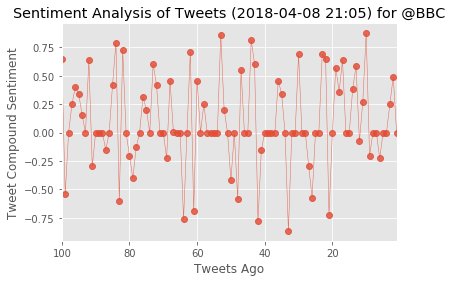

In [7]:
#x axis is tweets ago (look at Plot Sentiments activity)
#Y axis is compound sentiment
# Create plot
BBC_x_axis = BBC_df["Tweets Ago"]
BBC_y_axis = BBC_df["Sentiment Compound Score"]
plt.plot(BBC_x_axis,
         BBC_y_axis, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user1}")
plt.xlim([BBC_x_axis.max(),BBC_x_axis.min()]) #Bonus
plt.ylabel("Tweet Compound Sentiment")
plt.xlabel("Tweets Ago")
plt.savefig("{target_user1}.png")
plt.show()



In [8]:
#repeat for each news source
#(I at first tried to loop this for each news source and preserve the compound sentiment variable for each news source
#in a dictionary to later use them in my bar graph... but I didn't really figure that one out and wanted to keep 
#and not overwrite the compound sentiment variable each time the code ran for a new news source. But that doesn't 
#really scale and so I inelegantly just did the code 5 times for each news source...

target_user2 = "@CNN"

# Counter
counter = 1

# Variables for holding sentiments, tweet text, and date (to pass in df later)
CNN_compound_list = []
CNN_positive_list = []
CNN_negative_list = []
CNN_neutral_list = []
CNN_tweet_text = []
CNN_tweet_date = []
CNN_tweets_ago = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from target user
    public_tweets = api.user_timeline(target_user2, max_id = oldest_tweet)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        CNN_target_sample = tweet["text"]
        CNN_date = tweet["created_at"]

        CNN_results = analyzer.polarity_scores(CNN_target_sample)
    

        # Run analysis
        compound = CNN_results["compound"]
        pos = CNN_results["pos"]
        neu = CNN_results["neu"]
        neg = CNN_results["neg"]
        tweets_ago = counter
        
        # Print Analysis
        #print(target_sample)
        #print("BBC Compound Score:", compound)
        #print("BBC Positive Score:", pos)
        #print("BBC Neutral Score:", neu)
        #print("BBC Negative Score: ", neg)
        
         # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1

        # Add each value to the appropriate list
        CNN_compound_list.append(compound)
        CNN_positive_list.append(pos)
        CNN_negative_list.append(neg)
        CNN_neutral_list.append(neu)
        CNN_tweet_text.append(CNN_target_sample)
        CNN_tweet_date.append(CNN_date)
        CNN_tweets_ago.append(counter)
        
        # Add to counter 
        counter += 1

In [9]:
# Print the Averages
print(f"User: {target_user2}")
print(f"Compound: {np.mean(CNN_compound_list):.3f}")
print(f"Positive: {np.mean(CNN_positive_list):.3f}")
print(f"Neutral: {np.mean(CNN_neutral_list):.3f}")
print(f"Negative: {np.mean(CNN_negative_list):.3f}")

User: @CNN
Compound: -0.087
Positive: 0.068
Neutral: 0.823
Negative: 0.110


In [10]:
#make a df with columns twitter account, tweet text, tweet date, tweet compound score, tweet pos score, 
#tweet neg score, tweet neu score

CNN_df = pd.DataFrame({"Source Account":target_user2,"Tweet Text":CNN_tweet_text,"Tweet Date":CNN_tweet_date,
                      "Sentiment Compound Score":CNN_compound_list,"Sentiment Positive Score":CNN_positive_list,
                      "Sentiment Negative Score":CNN_negative_list, "Sentiment Neutral Score":CNN_neutral_list,
                      "Tweets Ago":CNN_tweets_ago})
CNN_df.head()

,Sentiment Compound Score,Sentiment Negative Score,Sentiment Neutral Score,Sentiment Positive Score,Source Account,Tweet Date,Tweet Text,Tweets Ago
0,-0.7906,0.368,0.632,0.000,@CNN,Mon Apr 09 04:00:19 +0000 2018,Son of former NHL player among those dead in C...,1
1,0.0000,0.000,1.000,0.000,@CNN,Mon Apr 09 03:37:04 +0000 2018,"Deutsche Bank, Germany's biggest lender, is ge...",2
2,0.5859,0.000,0.759,0.241,@CNN,Mon Apr 09 03:30:06 +0000 2018,16-year-old breaks Commonwealth Games record t...,3
3,-0.5719,0.236,0.764,0.000,@CNN,Mon Apr 09 03:13:55 +0000 2018,"""A Quiet Place"" leads box office as horror kee...",4
4,0.0000,0.000,1.000,0.000,@CNN,Mon Apr 09 03:00:19 +0000 2018,4 questions Congress must ask Facebook CEO Mar...,5


In [11]:
#export the df to csv
CNN_df.to_csv("Output/CNN.csv", encoding="utf-8", index=False, header=True)
print("exported!")

exported!


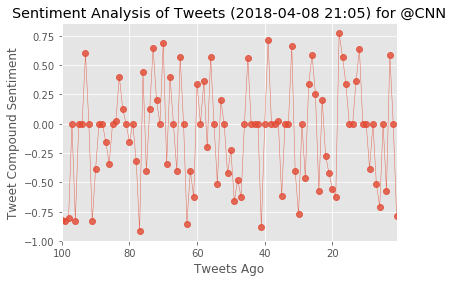

In [12]:
#x axis is tweets ago (look at Plot Sentiments activity)
#Y axis is compound sentiment
# Create plot
CNN_x_axis = CNN_df["Tweets Ago"]
CNN_y_axis = CNN_df["Sentiment Compound Score"]
plt.plot(CNN_x_axis,
         CNN_y_axis, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user2}")
plt.xlim([CNN_x_axis.max(),CNN_x_axis.min()]) #Bonus
plt.ylabel("Tweet Compound Sentiment")
plt.xlabel("Tweets Ago")
plt.savefig("{target_user2}.png")
plt.show()


In [13]:
#repeat for each news source
#(I chose not to loop this so that I could preserve the compound variable for each news source and later use them 
#in bar graph... but there's probably a more elegant way to do that)
target_user3 = "@CBS"

# Counter
counter = 1

# Variables for holding sentiments, tweet text, and date (to pass in df later)
CBS_compound_list = []
CBS_positive_list = []
CBS_negative_list = []
CBS_neutral_list = []
CBS_tweet_text = []
CBS_tweet_date = []
CBS_tweets_ago = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from target user
    public_tweets = api.user_timeline(target_user3, max_id = oldest_tweet)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        CBS_target_sample = tweet["text"]
        CBS_date = tweet["created_at"]

        CBS_results = analyzer.polarity_scores(CBS_target_sample)
    

        # Run analysis
        compound = CBS_results["compound"]
        pos = CBS_results["pos"]
        neu = CBS_results["neu"]
        neg = CBS_results["neg"]
        tweets_ago = counter
        
        # Print Analysis
        #print(target_sample)
        #print("BBC Compound Score:", compound)
        #print("BBC Positive Score:", pos)
        #print("BBC Neutral Score:", neu)
        #print("BBC Negative Score: ", neg)
        
         # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1

        # Add each value to the appropriate list
        CBS_compound_list.append(compound)
        CBS_positive_list.append(pos)
        CBS_negative_list.append(neg)
        CBS_neutral_list.append(neu)
        CBS_tweet_text.append(CBS_target_sample)
        CBS_tweet_date.append(CBS_date)
        CBS_tweets_ago.append(counter)
        
        # Add to counter 
        counter += 1

In [14]:
# Print the Averages
print(f"User: {target_user3}")
print(f"Compound: {np.mean(CBS_compound_list):.3f}")
print(f"Positive: {np.mean(CBS_positive_list):.3f}")
print(f"Neutral: {np.mean(CBS_neutral_list):.3f}")
print(f"Negative: {np.mean(CBS_negative_list):.3f}")

User: @CBS
Compound: 0.370
Positive: 0.152
Neutral: 0.829
Negative: 0.019


In [15]:
#make a df with columns twitter account, tweet text, tweet date, tweet compound score, tweet pos score, 
#tweet neg score, tweet neu score

CBS_df = pd.DataFrame({"Source Account":target_user3,"Tweet Text":CBS_tweet_text,"Tweet Date":CBS_tweet_date,
                      "Sentiment Compound Score":CBS_compound_list,"Sentiment Positive Score":CBS_positive_list,
                      "Sentiment Negative Score":CBS_negative_list, "Sentiment Neutral Score":CBS_neutral_list,
                      "Tweets Ago":CBS_tweets_ago})
CBS_df.head()

,Sentiment Compound Score,Sentiment Negative Score,Sentiment Neutral Score,Sentiment Positive Score,Source Account,Tweet Date,Tweet Text,Tweets Ago
0,0.6467,0.0,0.720,0.280,@CBS,Mon Apr 09 01:42:06 +0000 2018,It's time to celebrate! @MomCBS will be back f...,1
1,0.7096,0.0,0.742,0.258,@CBS,Sun Apr 08 22:00:01 +0000 2018,@OldDominion's Matthew Ramsey is here with a f...,2
2,0.5562,0.0,0.854,0.146,@CBS,Sun Apr 08 18:38:13 +0000 2018,It all comes down to this! Stream Round 4 of #...,3
3,0.4199,0.0,0.892,0.108,@CBS,Sun Apr 08 15:00:00 +0000 2018,@reba is ready for her hosting duties! In just...,4
4,0.6696,0.0,0.817,0.183,@CBS,Sat Apr 07 19:35:08 +0000 2018,Watch some of the biggest names in golf compet...,5


In [16]:
#export the df to csv
CBS_df.to_csv("Output/CBS.csv", encoding="utf-8", index=False, header=True)
print("exported!")

exported!


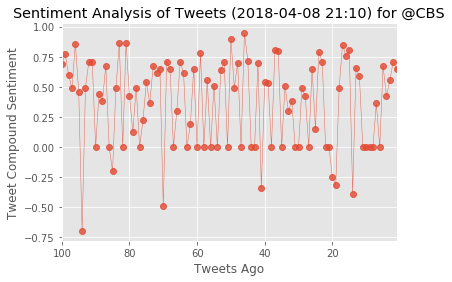

In [18]:
#x axis is tweets ago (look at Plot Sentiments activity)
#Y axis is compound sentiment
# Create plot
CBS_x_axis = CBS_df["Tweets Ago"]
CBS_y_axis = CBS_df["Sentiment Compound Score"]
plt.plot(CBS_x_axis,
         CBS_y_axis, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user3}")
plt.xlim([CBS_x_axis.max(),CBS_x_axis.min()]) #Bonus
plt.ylabel("Tweet Compound Sentiment")
plt.xlabel("Tweets Ago")
plt.savefig("{target_user3}.png")
plt.show()


In [19]:
#repeat for each news source
#(I chose not to loop this so that I could preserve the compound variable for each news source and later use them 
#in bar graph... but there's probably a more elegant way to do that)
target_user4 = "@FoxNews"

# Counter
counter = 1

# Variables for holding sentiments, tweet text, and date (to pass in df later)
FOX_compound_list = []
FOX_positive_list = []
FOX_negative_list = []
FOX_neutral_list = []
FOX_tweet_text = []
FOX_tweet_date = []
FOX_tweets_ago = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from target user
    public_tweets = api.user_timeline(target_user4, max_id = oldest_tweet)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        FOX_target_sample = tweet["text"]
        FOX_date = tweet["created_at"]

        FOX_results = analyzer.polarity_scores(FOX_target_sample)
    

        # Run analysis
        compound = FOX_results["compound"]
        pos = FOX_results["pos"]
        neu = FOX_results["neu"]
        neg = FOX_results["neg"]
        tweets_ago = counter
        
        # Print Analysis
        #print(target_sample)
        #print("BBC Compound Score:", compound)
        #print("BBC Positive Score:", pos)
        #print("BBC Neutral Score:", neu)
        #print("BBC Negative Score: ", neg)
        
         # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1

        # Add each value to the appropriate list
        FOX_compound_list.append(compound)
        FOX_positive_list.append(pos)
        FOX_negative_list.append(neg)
        FOX_neutral_list.append(neu)
        FOX_tweet_text.append(FOX_target_sample)
        FOX_tweet_date.append(FOX_date)
        FOX_tweets_ago.append(counter)
        
        # Add to counter 
        counter += 1

In [20]:
# Print the Averages
print(f"User: {target_user4}")
print(f"Compound: {np.mean(FOX_compound_list):.3f}")
print(f"Positive: {np.mean(FOX_positive_list):.3f}")
print(f"Neutral: {np.mean(FOX_neutral_list):.3f}")
print(f"Negative: {np.mean(FOX_negative_list):.3f}")

User: @FoxNews
Compound: -0.082
Positive: 0.067
Neutral: 0.825
Negative: 0.108


In [21]:
#make a df with columns twitter account, tweet text, tweet date, tweet compound score, tweet pos score, 
#tweet neg score, tweet neu score

FOX_df = pd.DataFrame({"Source Account":target_user4,"Tweet Text":FOX_tweet_text,"Tweet Date":FOX_tweet_date,
                      "Sentiment Compound Score":FOX_compound_list,"Sentiment Positive Score":FOX_positive_list,
                      "Sentiment Negative Score":FOX_negative_list, "Sentiment Neutral Score":FOX_neutral_list,
                      "Tweets Ago":FOX_tweets_ago})
FOX_df.head()

,Sentiment Compound Score,Sentiment Negative Score,Sentiment Neutral Score,Sentiment Positive Score,Source Account,Tweet Date,Tweet Text,Tweets Ago
0,0.3612,0.000,0.878,0.122,@FoxNews,Mon Apr 09 04:10:00 +0000 2018,North Korea has told the @realDonaldTrump admi...,1
1,0.4939,0.000,0.873,0.127,@FoxNews,Mon Apr 09 04:05:00 +0000 2018,"Rain or shine, soldiers keep watch over the To...",2
2,0.3818,0.000,0.885,0.115,@FoxNews,Mon Apr 09 04:00:01 +0000 2018,".@FrankLuntz: ""It's [@POTUS's] own tweets that...",3
3,0.0000,0.000,1.000,0.000,@FoxNews,Mon Apr 09 03:58:00 +0000 2018,".@kdeleon: ""This President, @realDonaldTrump, ...",4
4,-0.2960,0.099,0.901,0.000,@FoxNews,Mon Apr 09 03:57:00 +0000 2018,".@RepMcCaul: ""When the drug cartel sees our mi...",5


In [22]:
#export the df to csv
FOX_df.to_csv("Output/FOX.csv", encoding="utf-8", index=False, header=True)
print("exported!")

exported!


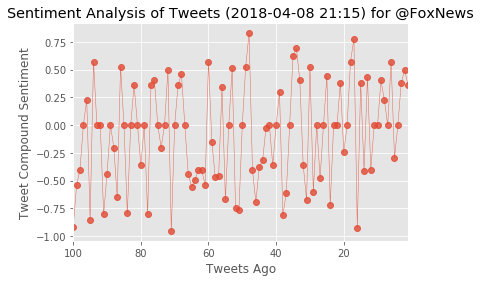

In [23]:
#x axis is tweets ago (look at Plot Sentiments activity)
#Y axis is compound sentiment
# Create plot
FOX_x_axis = FOX_df["Tweets Ago"]
FOX_y_axis = FOX_df["Sentiment Compound Score"]
plt.plot(FOX_x_axis,
         FOX_y_axis, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user4}")
plt.xlim([FOX_x_axis.max(),FOX_x_axis.min()]) #Bonus
plt.ylabel("Tweet Compound Sentiment")
plt.xlabel("Tweets Ago")
plt.savefig("{target_user4}.png")
plt.show()

In [24]:
#repeat for each news source
#(I chose not to loop this so that I could preserve the compound variable for each news source and later use them 
#in bar graph... but there's probably a more elegant way to do that)
target_user5 = "@NYT"

# Counter
counter = 1

# Variables for holding sentiments, tweet text, and date (to pass in df later)
NYT_compound_list = []
NYT_positive_list = []
NYT_negative_list = []
NYT_neutral_list = []
NYT_tweet_text = []
NYT_tweet_date = []
NYT_tweets_ago = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from target user
    public_tweets = api.user_timeline(target_user5, max_id = oldest_tweet)

    # Loop through all tweets
    for tweet in public_tweets:

        # Run Vader Analysis on each tweet
        NYT_target_sample = tweet["text"]
        NYT_date = tweet["created_at"]

        NYT_results = analyzer.polarity_scores(NYT_target_sample)
    

        # Run analysis
        compound = NYT_results["compound"]
        pos = NYT_results["pos"]
        neu = NYT_results["neu"]
        neg = NYT_results["neg"]
        tweets_ago = counter
        
        # Print Analysis
        #print(target_sample)
        #print("BBC Compound Score:", compound)
        #print("BBC Positive Score:", pos)
        #print("BBC Neutral Score:", neu)
        #print("BBC Negative Score: ", neg)
        
         # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1

        # Add each value to the appropriate list
        NYT_compound_list.append(compound)
        NYT_positive_list.append(pos)
        NYT_negative_list.append(neg)
        NYT_neutral_list.append(neu)
        NYT_tweet_text.append(NYT_target_sample)
        NYT_tweet_date.append(NYT_date)
        NYT_tweets_ago.append(counter)
        
        # Add to counter 
        counter += 1

In [25]:
# Print the Averages
print(f"User: {target_user5}")
print(f"Compound: {np.mean(NYT_compound_list):.3f}")
print(f"Positive: {np.mean(NYT_positive_list):.3f}")
print(f"Neutral: {np.mean(NYT_neutral_list):.3f}")
print(f"Negative: {np.mean(NYT_negative_list):.3f}")

User: @NYT
Compound: -0.047
Positive: 0.065
Neutral: 0.840
Negative: 0.095


In [26]:
#make a df with columns twitter account, tweet text, tweet date, tweet compound score, tweet pos score, 
#tweet neg score, tweet neu score
NYT_df = pd.DataFrame({"Source Account":target_user5,"Tweet Text":NYT_tweet_text,"Tweet Date":NYT_tweet_date,
                      "Sentiment Compound Score":NYT_compound_list,"Sentiment Positive Score":NYT_positive_list,
                      "Sentiment Negative Score":NYT_negative_list, "Sentiment Neutral Score":NYT_neutral_list,
                      "Tweets Ago":NYT_tweets_ago})
NYT_df.head()

,Sentiment Compound Score,Sentiment Negative Score,Sentiment Neutral Score,Sentiment Positive Score,Source Account,Tweet Date,Tweet Text,Tweets Ago
0,0.3400,0.000,0.745,0.255,@NYT,Mon Apr 09 04:04:57 +0000 2018,19th-Century Playbills to Be Restored and Digi...,1
1,0.5106,0.000,0.732,0.268,@NYT,Mon Apr 09 03:50:56 +0000 2018,"Trust: ‘Trust’ Season 1, Episode 3: Change of ...",2
2,0.3919,0.100,0.687,0.213,@NYT,Mon Apr 09 03:49:56 +0000 2018,"On Golf: Jordan Spieth Misses a Victory, but G...",3
3,0.0000,0.000,1.000,0.000,@NYT,Mon Apr 09 03:04:57 +0000 2018,"Billions: ‘Billions’ Season 3, Episode 3: Boss...",4
4,-0.6872,0.288,0.712,0.000,@NYT,Mon Apr 09 02:49:57 +0000 2018,"Orioles 8, Yankees 7 | 12 innings: More Whiffs...",5


In [27]:
#export the df to csv
NYT_df.to_csv("Output/NYT.csv", encoding="utf-8", index=False, header=True)
print("exported!")

exported!


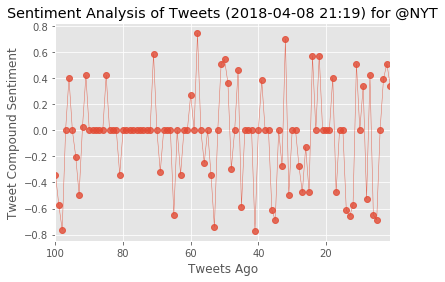

In [28]:
#x axis is tweets ago (look at Plot Sentiments activity)
#Y axis is compound sentiment
# Create plot
NYT_x_axis = NYT_df["Tweets Ago"]
NYT_y_axis = NYT_df["Sentiment Compound Score"]
plt.plot(NYT_x_axis,
         NYT_y_axis, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user5}")
plt.xlim([NYT_x_axis.max(),NYT_x_axis.min()]) #Bonus
plt.ylabel("Tweet Compound Sentiment")
plt.xlabel("Tweets Ago")
plt.savefig("{target_user5}.png")
plt.show()

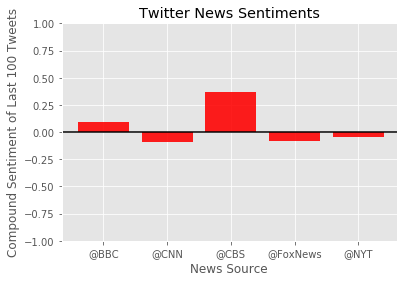

In [36]:
#bar graph: target users in x, compound means in y
#create arrays for news sources and their compound means
news_sources = ["@BBC", "@CNN", "@CBS", "@FoxNews", "@NYT"]
compound_means = [np.mean(BBC_compound_list), np.mean(CNN_compound_list), np.mean(CBS_compound_list),
                 np.mean(FOX_compound_list), np.mean(NYT_compound_list)]
x_axis = np.arange(len(news_sources))

# apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, compound_means, color='r', alpha=0.5, align="edge")
plt.axhline(0, color='black')

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, news_sources)

# Sets the x limits of the current chart
plt.xlim(-0.25, len(x_axis))

# Sets the y limits of the current chart
plt.ylim(-1, 1)

# Give our chart some labels and a tile
plt.title("Twitter News Sentiments")
plt.xlabel("News Source")
plt.ylabel("Compound Sentiment of Last 100 Tweets")

# Save an image of the chart and print it to the screen
plt.savefig("NewsSentiments.png")
plt.show()

In [ ]:
#3 Observable Trends:
#1: Most major news sources seem to consciously try and keep their tweets neutral in tone. All sources scanned here
#had neutral sentiment scores in the .8 range, with pos and neg score in the .0 or .1 ranges. Thus their compound
#scores were relatively close to zero. I suspect the major news sources actually use sentiment analysis 
#of their Twitter feeds and other public materials (even articles) in order to ensure this.

#2:CBS had more positive tweets than the other sources here.

#3: The NYT was the source whose tweets hold closest to a zero compound score overall. 

